In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('BostonHouse.csv.csv')

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
predictors = df.iloc[:, :-1]
response = df.iloc[:, -1]

In [7]:
predictors[:2]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [8]:
response[:2]

0    24.0
1    21.6
Name: medv, dtype: float64

In [9]:
# apply linear regression

X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [10]:
# predicting on test

y_pred = lin_reg.predict(X_test)

In [11]:
# calculating mse

r2score = r2_score(y_test, y_pred)
print('R2 score:', r2score)

R2 score: 0.6687594935356326


In [12]:
# putting together the coefficient and their corresponding variable names

coeff_df = pd.DataFrame()
coeff_df['Column_name'] = X_train.columns
coeff_df['Coefficient_value'] = pd.Series(lin_reg.coef_)
print(coeff_df.head(15))

   Column_name  Coefficient_value
0         crim          -0.113056
1           zn           0.030110
2        indus           0.040381
3         chas           2.784438
4          nox         -17.202633
5           rm           4.438835
6          age          -0.006296
7          dis          -1.447865
8          rad           0.262430
9          tax          -0.010647
10     ptratio          -0.915456
11       black           0.012351
12       lstat          -0.508571


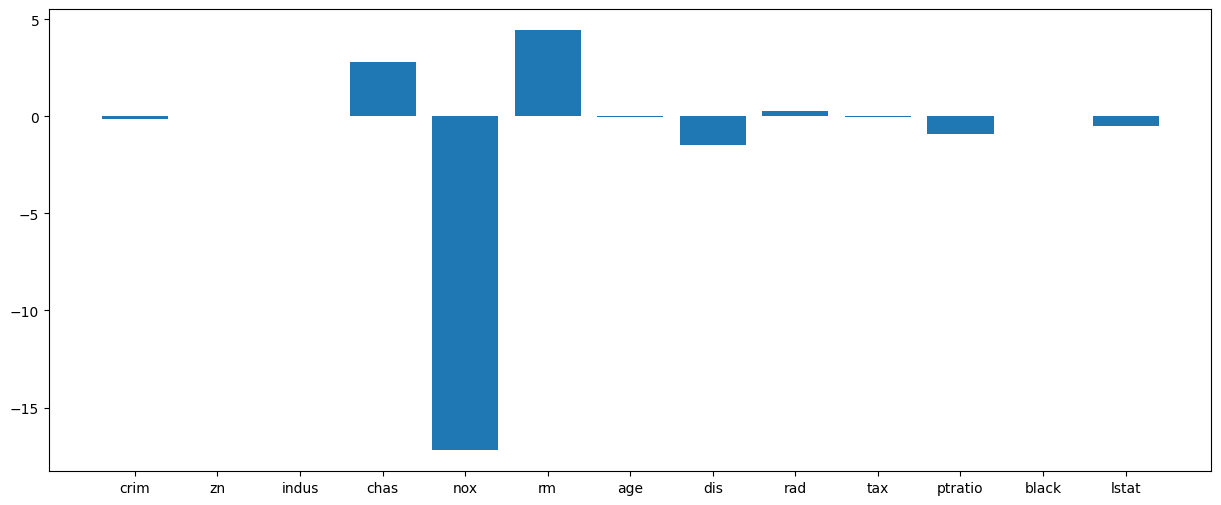

In [13]:
plt.rcParams["figure.figsize"] = (15,6)
plt.bar(coeff_df['Column_name'], coeff_df['Coefficient_value'])
plt.show()

By looking coefficient, nox is strong variable and also rm etc.

In [14]:
# import ridge regression library

from sklearn.linear_model import Ridge

# train the model

ridge_reg = Ridge(alpha=1) # setting alpha value 1 that means lambda value in theoritical part

ridge_reg.fit(X_train, y_train)
y_pred1 = ridge_reg.predict(X_test)

# calculating r2score

R2_score = r2_score(y_test, y_pred1)
print("R2 Score:",R2_score)


R2 Score: 0.6662221670168523


In [15]:
coeff_df1 = pd.DataFrame()
coeff_df1['Column_name'] = X_train.columns
coeff_df1['Coefficient_value'] = pd.Series(ridge_reg.coef_)
print(coeff_df1.head(15))

   Column_name  Coefficient_value
0         crim          -0.109234
1           zn           0.032271
2        indus           0.007498
3         chas           2.545470
4          nox          -9.537952
5           rm           4.464505
6          age          -0.012191
7          dis          -1.338700
8          rad           0.248882
9          tax          -0.011475
10     ptratio          -0.828604
11       black           0.012642
12       lstat          -0.523833


 we can notice that nox value changed to -17 to -9

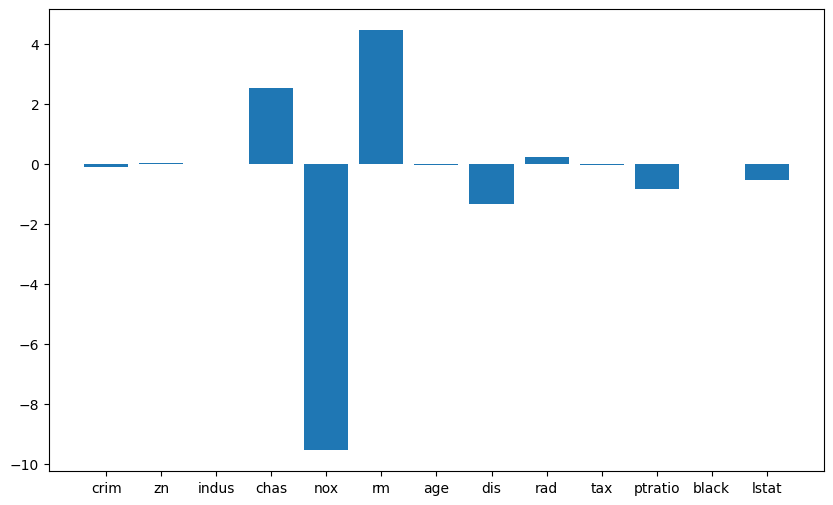

In [16]:
plt.rcParams["figure.figsize"] = (10,6)
plt.bar(coeff_df1['Column_name'], coeff_df1['Coefficient_value'])
plt.show()

In [20]:
# Lasso regression
from sklearn.linear_model import Lasso

# train the model

lasso_reg = Lasso(alpha=1) # setting alpha value 1 that means lambda value in theoritical part

lasso_reg.fit(X_train, y_train)
y_pred2 = lasso_reg.predict(X_test)

# calculating r2score

R2_score = r2_score(y_test, y_pred2)
print("R2 Score:",R2_score)



R2 Score: 0.6671453631686304


In [21]:
coeff_df2 = pd.DataFrame()
coeff_df2['Column_name'] = X_train.columns
coeff_df2['Coefficient_value'] = pd.Series(lasso_reg.coef_)
print(coeff_df2.head(15))

   Column_name  Coefficient_value
0         crim          -0.076609
1           zn           0.028501
2        indus          -0.000000
3         chas           0.000000
4          nox          -0.000000
5           rm           1.630489
6          age           0.016395
7          dis          -0.630858
8          rad           0.219654
9          tax          -0.012286
10     ptratio          -0.708582
11       black           0.011181
12       lstat          -0.747107


When we see coefficient values of nox, chas, indus it completely zero


1.   Hence we can say that lasso can also act as feature selector
2.   List item

